<a href="https://colab.research.google.com/github/Maureenchepkirui/Week-2-Ip-Core/blob/main/Copy_of_Maureen_Chepkirui_wk2_core_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Defining the Question**

Specifying the Data Analytic Question
How Kenya, Uganda, Tanzania use banks and bank accounts.

2. **Defining the Metric for Success**

Timeline for analysis of the dataset

3. **Understanding the context**

Financial inclusion in Africa is a big problem and known to hinder development in the continent. In Kenya, Uganda, Rwanda, and Tanzania only 13.9% of the adult population have bank accounts.

4. **Recording the Experimental Design**

Principal component analysis

Discriminant analysis

5. **Data Relevance**

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

FinAccess Kenya 2018. [https://fsdkenya.org/publication/finaccess2019/]

Finscope Rwanda 2016. [http://www.statistics.gov.rw/publication/finscope-rwanda-2016]

Finscope Tanzania 2017. [http://www.fsdt.or.tz/finscope/]

Finscope Uganda 2018. [http://fsduganda.or.ug/finscope-2018-survey-report/]

Dataset Files:

Variable Definitions: https://bit.ly/VariableDefinitions (Links to an external site.)

Dataset: https://bit.ly/FinancialDataset (Links to an external site.)



**2.** **Reading the Data**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the Data from the source.

# Dataset url = http://bit.ly/FinancialDataset 


df = pd.read_csv("http://bit.ly/FinancialDataset")

3. **Checking the Data**

In [ ]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# defining the shape of the number of records in the dataset
df.shape

(23524, 13)

In [ ]:
# Checking whether each column has an appropriate datatype

df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

4. **External Data Source Validation**

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number

5. **Tidying the Dataset**

AxesSubplot(0.125,0.125;0.775x0.755)


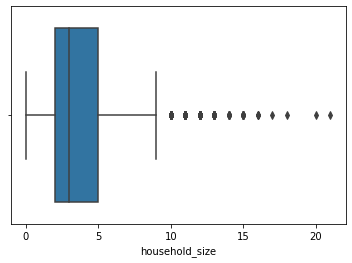

In [ ]:
# Checking for Outliers
#we first visualize the outliers for the float and int variables.
print(sns.boxplot(x =df['household_size']))

There are outliers in household size

AxesSubplot(0.125,0.125;0.775x0.755)


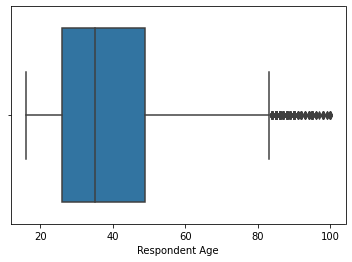

In [ ]:
# Checking for Outliers in Respondent Age
#
print(sns.boxplot(x =df['Respondent Age']))

There are outliers in Respondent age

In [ ]:
#removing the outlliers using IQR.
#removing the outlliers using IQR.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)
df['year'] = df['year'].astype('str')
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

household_size     3.0
Respondent Age    23.0
dtype: float64
       Cell Phone Access  Has a Bank account  ...  uniqueid   year
0                  False               False  ...     False  False
1                  False               False  ...     False  False
2                  False               False  ...     False  False
3                  False               False  ...     False  False
4                  False               False  ...     False  False
...                  ...                 ...  ...       ...    ...
23519              False               False  ...     False  False
23520              False               False  ...     False  False
23521              False               False  ...     False  False
23522              False               False  ...     False  False
23523              False               False  ...     False  False

[23524 rows x 13 columns]


**Cheking for anomalies**

In [ ]:
# Identifying the Missing Data
#
df1.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# Dealing with the Missing Data
#
df2=df1.dropna()
df2.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
#checking for duplicates.
df2.duplicated().sum()

0

No duplicates

6.**EXPLORATORY DATA ANALYSIS**

**a) Univariate analysis**

In [ ]:
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**Creating frequency tables**

In [ ]:
df2.gender_of_respondent.value_counts()

Female    13398
Male       9330
Name: gender_of_respondent, dtype: int64

In [ ]:
df2.country.value_counts()

Rwanda      8513
Tanzania    6424
Kenya       5870
Uganda      1921
Name: country, dtype: int64

**Measure of central tendency**

**a.Mean**

In [ ]:
#Household size mean
df2["household_size"].mean()

3.5799454417458643

In [ ]:
#RespondentAge mean
df2["Respondent Age"].mean()

38.34644491376276

**b. Mode**

In [ ]:
#Respondent Age mode
df2["Respondent Age"].mode()

0    30.0
dtype: float64

In [ ]:
#Household size mode
df2["household_size"].mode()

0    2.0
dtype: float64

**c. Median**

In [ ]:
#Household size median
df2["household_size"].median()

3.0

In [ ]:
#Respondent Age median
df2["Respondent Age"].median()

35.0

In [ ]:
df2.describe()

,household_size,Respondent Age
count,22728.000000,22728.000000
mean,3.579945,38.346445
std,2.080472,15.806083
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,48.000000
max,9.000000,83.000000


**Measure of variability**

**a. Standard Deviation**

In [ ]:
#Standard deviation for respondent age
df2["Respondent Age"].std()

15.806083451261577

In [ ]:
#Standard deviation for household size
df2["household_size"].std()

2.080472172896514

**b. Variance**

In [ ]:
#variance of the Respondent age
df2["Respondent Age"].var()

249.83227406824508

In [ ]:
#variance of the household size
df2["household_size"].var()

4.328364462196743

**c.Range**

In [ ]:


#Finding minimum and maximum values
df2_max = df2["household_size"].max()
df2_min = df2["household_size"].min()

# Calculating the range
df2_max - df2_min

9.0

In [ ]:

#Range for hosehold size
#Finding minimum and maximum values
df2_max = df2["Respondent Age"].max()
df2_min = df2["Respondent Age"].min()

# Calculating the range
df2_max - df2_min

67.0

**d.Skewness**

In [ ]:
# Determining the skeweness for household size
df2["household_size"].skew()

0.6057809678526579

Household size has a positive skew

In [ ]:
# Determining the skeweness for household size
df2["Respondent Age"].skew()

0.7402596648483929

Respondent Age has a positive skew

**e.Kurtosis**

In [ ]:
# Determining the kurtosis for household size
df2["household_size"].kurt()

-0.5056067906817878

household size has negative kurtosis since it lacks oultliers and is therefore light tailed.

In [ ]:
# Determining the kurtosis for respondent age
df2["Respondent Age"].kurt()

-0.23732359970558425

Respondent Age has negative kurtosis since it lacks oultliers and is therefore light tailed.

**f.Quantiles**

In [ ]:
# Finding the quantiles of the hosehold size
df2["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [ ]:
# Finding the quantiles of the Respondent Age
df2["Respondent Age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: Respondent Age, dtype: float64

Visualizations

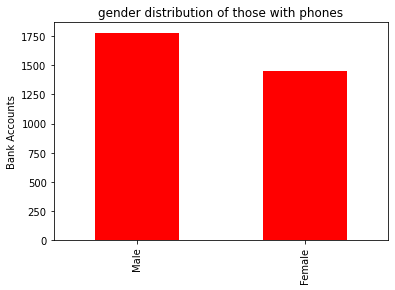

In [ ]:
#gender distibution of those with phones.
#a new dataframe is created where df2['Has a Bank account'] == 'Yes'
a=df2[df2['Has a Bank account'] == 'Yes']
a['gender_of_respondent'].value_counts().plot.bar(title='gender distribution of those with phones', color='red')
plt.ylabel('Bank Accounts')
plt.show()

Males have more phones than females

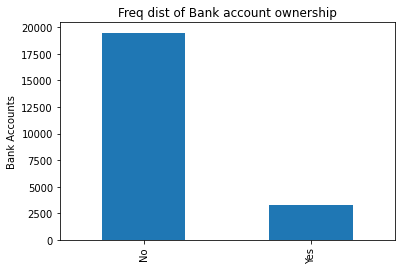

In [ ]:
#visualisation of bank account ownership.
df2['Has a Bank account'].value_counts().plot.bar(title='Freq dist of Bank account ownership', )
plt.ylabel('Bank Accounts')
plt.show()


Few people have bank accounts.

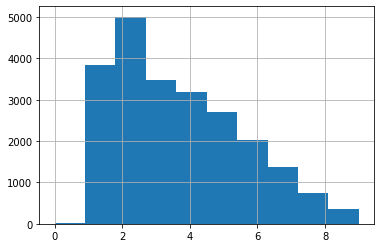

In [ ]:
#Histogram of household 
df2['household_size'].hist()
plt.show()

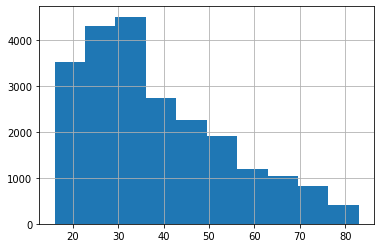

In [ ]:
#Histogram of respondent age 
df2['Respondent Age'].hist()
plt.show()

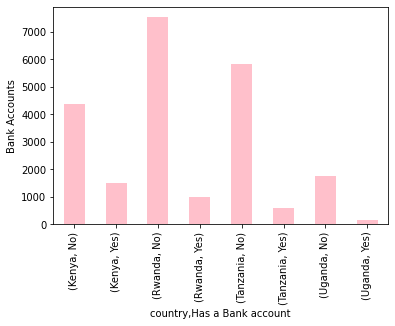

In [ ]:
# Bank account ownership vs country.
r=df2.groupby (['country','Has a Bank account'])['Has a Bank account'].count()
r.plot(kind='bar', color='pink')
plt.ylabel('Bank Accounts')
plt.show()

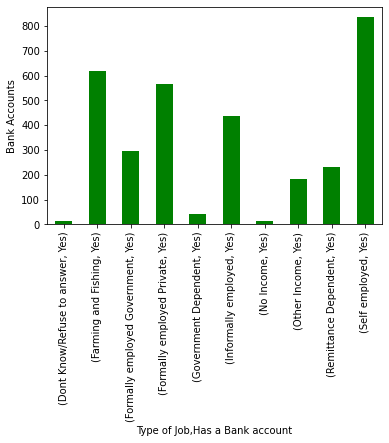

In [ ]:
#type of job vs bank account ownership
q=a.groupby (['Type of Job','Has a Bank account'])['Has a Bank account'].count()
q.plot(kind='bar',  color='green')
plt.ylabel('Bank Accounts')
plt.show()

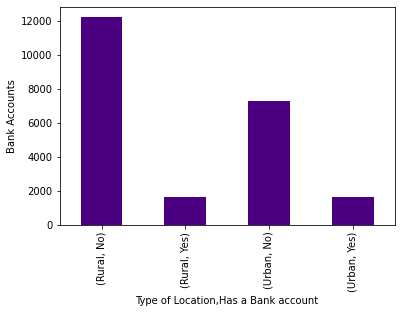

In [ ]:
#rural/urban vs bank accounts.
g=df2.groupby (['Type of Location','Has a Bank account'])['Has a Bank account'].count()
g.plot(kind='bar',  color='indigo')
plt.ylabel('Bank Accounts')
plt.show()

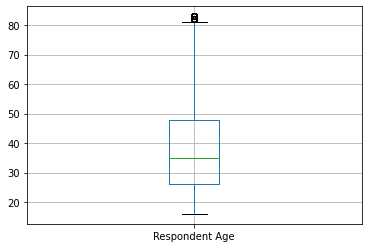

In [ ]:
# Creating the boxplot

df2.boxplot(["Respondent Age"])
plt.show()

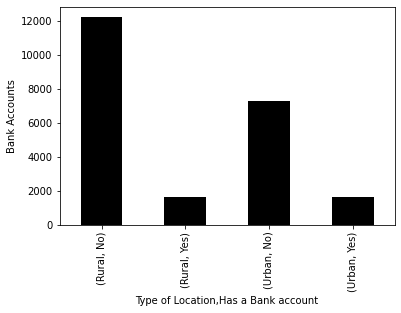

In [ ]:
#rural/urban vs bank accounts.
g=df2.groupby (['Type of Location','Has a Bank account'])['Has a Bank account'].count()
g.plot(kind='bar',  color='black')
plt.ylabel('Bank Accounts')
plt.show()

Text(0, 0.5, 'Bank Accounts')

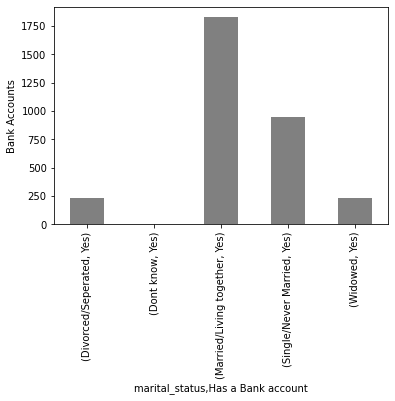

In [ ]:
#marital status vs bank account ownership
d=a.groupby (['marital_status','Has a Bank account'])['Has a Bank account'].count()
d.plot(kind='bar',  color='grey')
plt.ylabel('Bank Accounts')

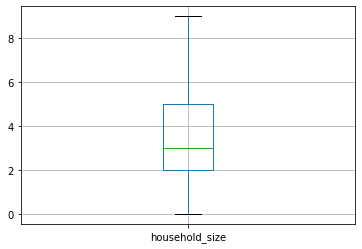

In [ ]:
#boxplot for household size
df2.boxplot(["household_size"])
plt.show()

**Bivariate Analysis**

In [ ]:
df2.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


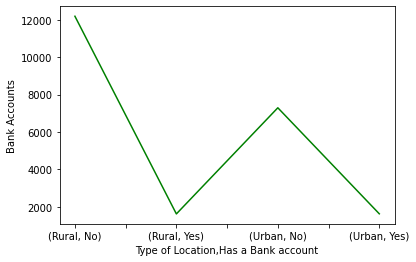

In [ ]:
h=df2.groupby (['Type of Location','Has a Bank account'])['Has a Bank account'].count()
h.plot(kind='line',  color='green')
plt.ylabel('Bank Accounts')
plt.show()

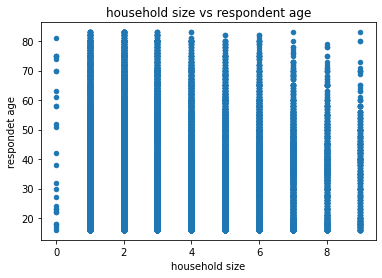

In [ ]:
#Scatter plot
 #Using Pandas: Plotting our scatterplot to compare the variables
df2.plot(x = 'household_size', y = 'Respondent Age', kind='scatter')

# Giving our scatterplot a title
plt.title('household size vs respondent age')

# Labelling our x axis
plt.xlabel('household size')

# Labelling our y axis
plt.ylabel('respondet age')

# We then display our scatterplot as shown below
plt.show()

In [ ]:
# Calculating the pearson coefficient for female gender
# Calculating the pearson coefficient for people with bank accounts
y=df2[df2['Has a Bank account'] == 'Yes']
y["household_size"].corr(y["Respondent Age"]) 

0.025159069419076287

In [ ]:
# Calculating the pearson coefficient for male gender
u=df2[df2['gender_of_respondent'] == 'Male']
u["household_size"].corr(y["Respondent Age"]) 

0.07976411063483198

In [ ]:
# Calculating the pearson coefficient for rural population
t=df2[df2['Type of Location'] == 'Rural']
t["household_size"].corr(y["Respondent Age"]) 

-0.029956755204531425

The rural population resident age and household size has a very weak negative correlation.

---



In [ ]:
# Calculating the pearson coefficient for urban population
r=df2[df2['Type of Location'] == 'Urban']
r["household_size"].corr(y["Respondent Age"]) 

0.06770838689660362

The corelation between the two is a very weak positive corelation

**Multivariate analysis**

Principal Component Analysis

In [ ]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
X = df2.iloc[:, 6:-5].values
y=df2['gender_of_respondent']

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(array([[ 3., 24.],
        [ 1., 72.],
        [ 3., 34.],
        ...,
        [ 2., 45.],
        [ 9., 42.],
        [ 6., 33.]]), array([[ 5., 23.],
        [ 6., 33.],
        [ 2., 35.],
        ...,
        [ 2., 53.],
        [ 3., 45.],
        [ 2., 24.]]), 20844    Female
 15749      Male
 12657    Female
 16059      Male
 20877    Female
           ...  
 13497    Female
 20229      Male
 10124      Male
 11094      Male
 2832       Male
 Name: gender_of_respondent, Length: 18182, dtype: object, 7805       Male
 10039    Female
 18863    Female
 22048    Female
 8443     Female
           ...  
 9569     Female
 12693      Male
 7287     Female
 5480     Female
 20264      Male
 Name: gender_of_respondent, Length: 4546, dtype: object)

In [ ]:
# Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.98315094, 0.01684906])

In [ ]:
# Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[2733    0]
 [1813    0]]
Accuracy0.6011878574571051


**Discriminant Analysis**

In [ ]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
A = df2.iloc[:, 6:-5].values
#b = df2[['country',	'year',	'uniqueid',	'Has a Bank account',	'Type of Location',	'Cell Phone Access','gender_of_respondent'	,'The relathip with head'	,'marital_status','Level of Educuation'	,'Type of Job']].values
b=df2['gender_of_respondent']

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=0)
A_train, A_test, b_train, b_test

(array([[ 3., 24.],
        [ 1., 72.],
        [ 3., 34.],
        ...,
        [ 2., 45.],
        [ 9., 42.],
        [ 6., 33.]]), array([[ 5., 23.],
        [ 6., 33.],
        [ 2., 35.],
        ...,
        [ 2., 53.],
        [ 3., 45.],
        [ 2., 24.]]), 20844    Female
 15749      Male
 12657    Female
 16059      Male
 20877    Female
           ...  
 13497    Female
 20229      Male
 10124      Male
 11094      Male
 2832       Male
 Name: gender_of_respondent, Length: 18182, dtype: object, 7805       Male
 10039    Female
 18863    Female
 22048    Female
 8443     Female
           ...  
 9569     Female
 12693      Male
 7287     Female
 5480     Female
 20264      Male
 Name: gender_of_respondent, Length: 4546, dtype: object)

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [ ]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
A_train = lda.fit_transform(A_train, b_train)
A_test = lda.transform(A_test)

In [ ]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(A_train, b_train)
b_pred = classifier.predict(A_test)

In [ ]:
#Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(b_test, b_pred))
print('Accuracy' + str(accuracy_score(b_test, b_pred)))

[[2715   18]
 [1804    9]]
Accuracy0.5992080950285966


**Challenging the solution**

The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.

 **Follow up questions**

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

a). Did we have the right data?

b). Do we need other data to answer our question?

c). Did we have the right question?

**Recommendations**

Mass awareness especially in the rural areas on matters financial.